In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [349]:
def CreatePoints(n_variables,n_samples,std):
    X = np.random.rand(n_samples, n_variables)
    X_ = np.ones([n_samples, n_variables+1])
    X_[:, :n_variables] = X
    beta = np.random.rand(1,n_variables+1)*20
    print(beta)
    Y = beta@(X_.T + np.random.normal(0, std, size = [1, n_samples]))
    return X_,Y.T
X,Y=CreatePoints(1,100,0.1)

[[11.94790513 12.67288432]]


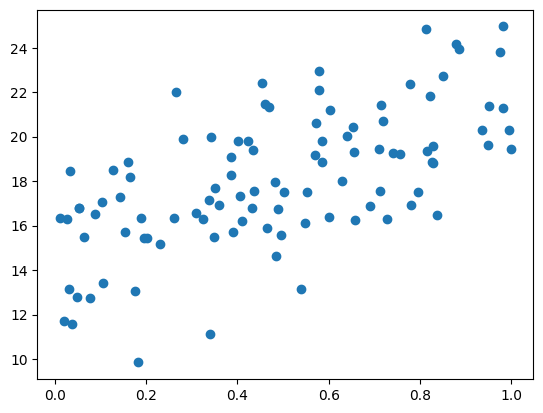

In [341]:
def ShowTendency(X,Y):
    plt.scatter(X[:,0],Y[:])
    plt.show()
ShowTendency(X,Y)

In [350]:
print(X)

[[0.82881806 1.        ]
 [0.64381035 1.        ]
 [0.16160897 1.        ]
 [0.81291527 1.        ]
 [0.56778561 1.        ]
 [0.7332015  1.        ]
 [0.51335489 1.        ]
 [0.78210804 1.        ]
 [0.96672565 1.        ]
 [0.85348329 1.        ]
 [0.34845497 1.        ]
 [0.09140196 1.        ]
 [0.02958557 1.        ]
 [0.94144913 1.        ]
 [0.38827303 1.        ]
 [0.56212042 1.        ]
 [0.9091835  1.        ]
 [0.93192784 1.        ]
 [0.09780405 1.        ]
 [0.49761173 1.        ]
 [0.8658867  1.        ]
 [0.7259314  1.        ]
 [0.27752843 1.        ]
 [0.07388257 1.        ]
 [0.28164894 1.        ]
 [0.51370353 1.        ]
 [0.36914911 1.        ]
 [0.72881342 1.        ]
 [0.70746573 1.        ]
 [0.70061986 1.        ]
 [0.67038828 1.        ]
 [0.74557258 1.        ]
 [0.78101575 1.        ]
 [0.74203306 1.        ]
 [0.52766459 1.        ]
 [0.9561407  1.        ]
 [0.32840899 1.        ]
 [0.87962055 1.        ]
 [0.56816521 1.        ]
 [0.7267814  1.        ]


In [353]:
def LinearRegression(X,Y):
    y_mean=Y.mean()
    x_mean=X.mean(axis=1)
    a=np.sum((Y-y_mean)*X[:,0])/np.sum((X[:,0]-x_mean)*X[:,0])
    b=np.sum(Y-a*X[:,0])/len(Y)
    return a,b
a,b=LinearRegression(X,Y)  
print(a,b)

-2.9718866335407116e-13 1931.086617638219
